In [1]:
import pandas as pd
import urllib.request
import json 
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from urllib import request, parse
import missingno as msno

import warnings
warnings.simplefilter("ignore")

/home/irina/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def get_prediction(field_array=None, myurl=None):
    """
    Input parameters:
        field_array: python list - contains raw fields needed to make a prediction
        myurl: REST API url
    Returns:
        result: float - model prediction
    """
    result = 0
    
    gender, relevent_experience, enrolled_university, education_level, major_discipline, \
    experience, company_size, company_type, last_new_job = field_array

    body = {
        'gender': gender,
        'relevent_experience': relevent_experience,
        'enrolled_university': enrolled_university,
        'education_level': education_level,
        'major_discipline': major_discipline,
        'experience': experience,
        'company_size': company_size,
        'company_type': company_type,
        'last_new_job': last_new_job
        } 

    req = urllib.request.Request(myurl)
    req.add_header('Content-Type', 'application/json; charset=utf-8')
    jsondata = json.dumps(body)
    jsondataasbytes = jsondata.encode('utf-8')   # needs to be bytes
    req.add_header('Content-Length', len(jsondataasbytes))
    response = urllib.request.urlopen(req, jsondataasbytes)
    
    return json.loads(response.read())['predictions']

API_URL = "http://0.0.0.0:8180/predict"

X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

In [3]:
X_test.head(3)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Female,Has relevent experience,no_enrollment,Graduate,STEM,5-8,100-1000,Pvt Ltd,1-4
1,Female,Has relevent experience,no_enrollment,Masters,Humanities,>15,100-1000,Funded Startup,1-4
2,Female,Has relevent experience,no_enrollment,Graduate,STEM,8-15,<100,Pvt Ltd,1-4


<AxesSubplot:>

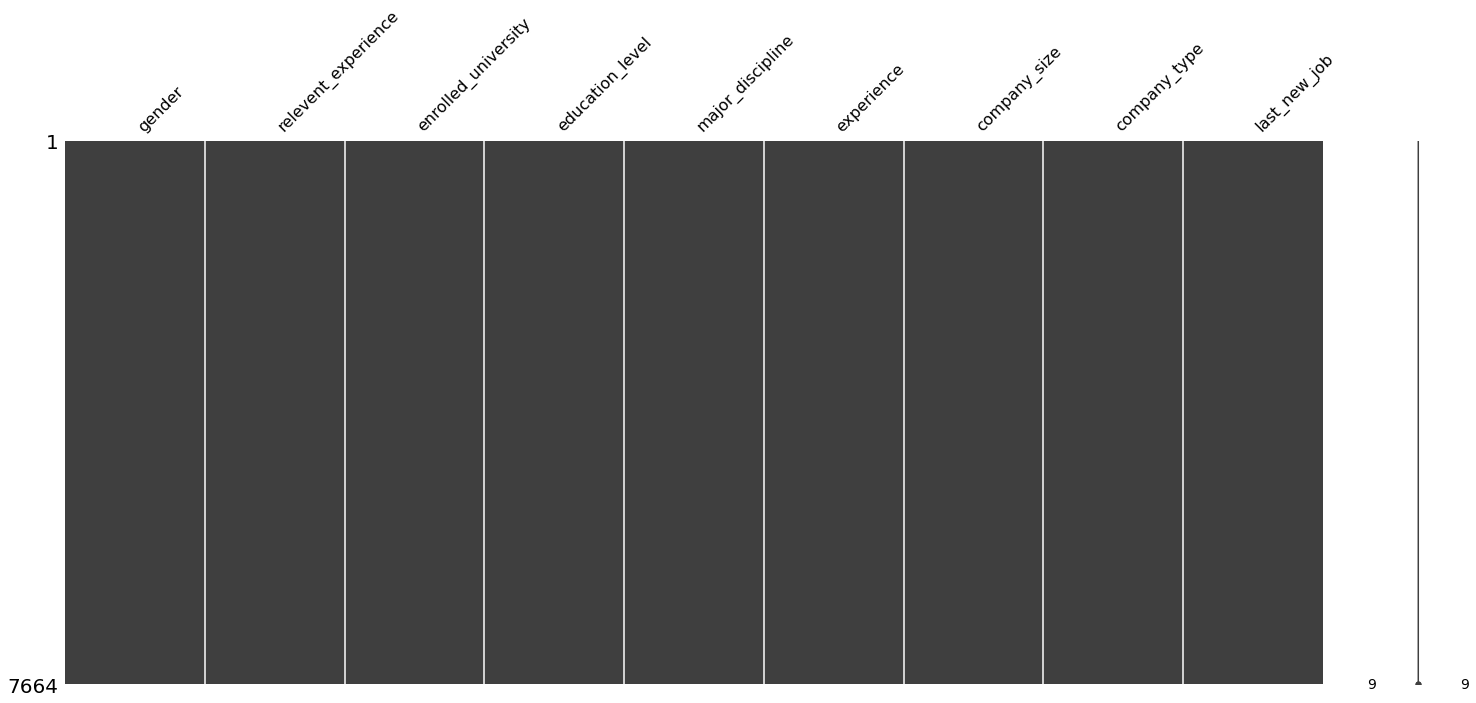

In [4]:
msno.matrix(X_test)

In [5]:
%%time
predictions = X_test.apply(lambda x: get_prediction(x, API_URL), axis=1)

CPU times: user 2.59 s, sys: 642 ms, total: 3.23 s
Wall time: 25.6 s


In [6]:
roc_auc_score(y_score=predictions.values, y_true=y_test)

0.7173382058790987

In [ ]:
0.7173382058790987